<h1><b>FINAL PROJECT BIG DATA PREDICTIVE ANALYTICS LANJUT</b></h1>
 <ul>
 <h4>Owner : Bagus Budi Satoto<h/2>
 </ul>

<h4><b>INSTALL PYSPARK</b></h4>

In [9]:
pip install pyspark

  Using cached pyspark-3.5.0.tar.gz (316.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached py4j-0.10.9.7-py2.py3-none-any.whl (200 kB)
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=0f5573e125ad31d66771e5111d9299f0af205d04bb93f657d7b2338de44057e3
  Stored in directory: /home/codespace/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


<h4><b>IMPORT LIBRARY</b></h4>

In [123]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,isnan,when,count,expr, udf
import seaborn as sns
from matplotlib import pyplot as plt
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import pandas as pd
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier,MultilayerPerceptronClassifier
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.mllib.evaluation import MulticlassMetrics
from sklearn.metrics import confusion_matrix

<h4><b>CREATE SESSION SPARK</b></h4>

In [4]:
spark = SparkSession.builder.getOrCreate()

23/12/11 05:59:27 WARN Utils: Your hostname, Mini resolves to a loopback address: 127.0.1.1; using 192.168.0.108 instead (on interface wlp3s0)
23/12/11 05:59:27 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/11 05:59:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


<h4><b>IMPORT DATASET</b></h4>

In [5]:
path = './Covid Data.csv'
df = spark.read.csv(path,inferSchema=True,header=True)

<h2><b>PREPARE DATASET</b></h2>

<h4><b>MELIHAT CONTOH DATASET</b></h4>

In [6]:
df.show(5)

+-----+------------+---+------------+----------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+
|USMER|MEDICAL_UNIT|SEX|PATIENT_TYPE| DATE_DIED|INTUBED|PNEUMONIA|AGE|PREGNANT|DIABETES|COPD|ASTHMA|INMSUPR|HIPERTENSION|OTHER_DISEASE|CARDIOVASCULAR|OBESITY|RENAL_CHRONIC|TOBACCO|CLASIFFICATION_FINAL|ICU|
+-----+------------+---+------------+----------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+
|    2|           1|  1|           1|03/05/2020|     97|        1| 65|       2|       2|   2|     2|      2|           1|            2|             2|      2|            2|      2|                   3| 97|
|    2|           1|  2|           1|03/06/2020|     97|        1| 72|      97|       2|   2|     2|      2|           1|            2|             2|      1|            1|    

<h4><b>MENGHAPUS COLUMN YANG KURANG BERGUNA</b></h4>

In [7]:
df = df.drop('DATE_DIED')

<h4><b>MELIHAT JUMLAH KOLOM DAN BARIS DATASET</b></h4>

In [8]:
print(f"Jumlah Baris Dalam Dataset : {df.count()} Baris")
print(f"Jumlah Kolom Dalam Dataset : {len(df.columns)}")

Jumlah Baris Dalam Dataset : 1048575 Baris
Jumlah Kolom Dalam Dataset : 20


<h4><b>MELIHAT TIPE DATA DARI SETIAP KOLOM</b></h4>

In [9]:
df.printSchema()

root
 |-- USMER: integer (nullable = true)
 |-- MEDICAL_UNIT: integer (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- PATIENT_TYPE: integer (nullable = true)
 |-- INTUBED: integer (nullable = true)
 |-- PNEUMONIA: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PREGNANT: integer (nullable = true)
 |-- DIABETES: integer (nullable = true)
 |-- COPD: integer (nullable = true)
 |-- ASTHMA: integer (nullable = true)
 |-- INMSUPR: integer (nullable = true)
 |-- HIPERTENSION: integer (nullable = true)
 |-- OTHER_DISEASE: integer (nullable = true)
 |-- CARDIOVASCULAR: integer (nullable = true)
 |-- OBESITY: integer (nullable = true)
 |-- RENAL_CHRONIC: integer (nullable = true)
 |-- TOBACCO: integer (nullable = true)
 |-- CLASIFFICATION_FINAL: integer (nullable = true)
 |-- ICU: integer (nullable = true)



<h4><b>MELIHAT DATA NULL DARI SETIAP KOLOM</b></h4>

In [10]:
df.select([count(when((col(c).isNull() | isnan(col(c)) | (col(c) == 'NA')), c)).alias(c) for c in df.columns]).toPandas().T

,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
INTUBED,0
PNEUMONIA,0
AGE,0
PREGNANT,0
DIABETES,0
COPD,0


<h4><b>MENGHAPUS DATA NULL ATAU 'NA'</b></h4>

In [11]:
df = df.na.drop()

<h4><b>MENGGANTI NAMA KOLOM MENJADI HURUF KECIL</b></h4>

In [12]:
df = df.select(*[col(c).alias(c.lower()) for c in df.columns])

<h3><b>MENGUBAH NILAI "PATIENT_TYPE" MENJADI BINARY 0 DAN 1</b></h3>

In [13]:
df = df.withColumn("patient_type", when(df["patient_type"] == 1.0, 0).otherwise(1))

<h2><b>DATA PRE-PROCESSING</b></h2>

<h3><b>MELIHAT DATA 5 TERATAS</b></h3>

In [14]:
df.show(5)

+-----+------------+---+------------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+
|usmer|medical_unit|sex|patient_type|intubed|pneumonia|age|pregnant|diabetes|copd|asthma|inmsupr|hipertension|other_disease|cardiovascular|obesity|renal_chronic|tobacco|clasiffication_final|icu|
+-----+------------+---+------------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+
|    2|           1|  1|           0|     97|        1| 65|       2|       2|   2|     2|      2|           1|            2|             2|      2|            2|      2|                   3| 97|
|    2|           1|  2|           0|     97|        1| 72|      97|       2|   2|     2|      2|           1|            2|             2|      1|            1|      2|                   5| 97|
|    2|           1|  2| 

<h3><b>MELIHAT DESKRIPSI DATASET</b></h3>

In [15]:
df.describe().toPandas()

23/12/11 05:59:48 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,summary,usmer,medical_unit,sex,patient_type,intubed,pneumonia,age,pregnant,diabetes,...,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,count,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,...,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575
1,mean,1.6321941682759935,8.980565052571347,1.4992594711870872,0.19076460911236678,79.52287533080609,3.3468306988055216,41.794102472403026,49.76558472212288,2.1864044059795438,...,2.2426264215721337,2.2981322270700715,2.1289893426793505,2.435142932074482,2.2618095987411486,2.125175595450969,2.2571795055193955,2.2143327849700785,5.305652909901533,79.55397372624752
2,stddev,0.48220838195439936,3.7232777781997557,0.49999969003549183,0.3929040852992876,36.86888627504416,11.912881086507987,16.907389199431183,47.510732711076386,5.42424178788834,...,5.114089259422005,5.462843261101409,5.2363970946060965,6.6466755910747075,5.194850371652742,5.175445110188388,5.135353853399502,5.323097220663561,1.8811654309355434,36.82307335289847
3,min,1,1,1,0,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
4,max,2,13,2,1,99,99,121,98,98,...,98,98,98,98,98,98,98,98,7,99


<h3><b>MELIHAT JUMLAH DATA UNIQUE TIAP KOLOM</b></h3>

In [16]:
for x in df.columns:
    print(f"Kolom '{x}' Memiliki Jumlah Data Unique Sebanyak : {df.dropDuplicates([x]).select(x).count()}")

Kolom 'usmer' Memiliki Jumlah Data Unique Sebanyak : 2


Kolom 'medical_unit' Memiliki Jumlah Data Unique Sebanyak : 13


Kolom 'sex' Memiliki Jumlah Data Unique Sebanyak : 2


Kolom 'patient_type' Memiliki Jumlah Data Unique Sebanyak : 2


Kolom 'intubed' Memiliki Jumlah Data Unique Sebanyak : 4


Kolom 'pneumonia' Memiliki Jumlah Data Unique Sebanyak : 3


Kolom 'age' Memiliki Jumlah Data Unique Sebanyak : 121


Kolom 'pregnant' Memiliki Jumlah Data Unique Sebanyak : 4


Kolom 'diabetes' Memiliki Jumlah Data Unique Sebanyak : 3


Kolom 'copd' Memiliki Jumlah Data Unique Sebanyak : 3


Kolom 'asthma' Memiliki Jumlah Data Unique Sebanyak : 3


Kolom 'inmsupr' Memiliki Jumlah Data Unique Sebanyak : 3


Kolom 'hipertension' Memiliki Jumlah Data Unique Sebanyak : 3


Kolom 'other_disease' Memiliki Jumlah Data Unique Sebanyak : 3


Kolom 'cardiovascular' Memiliki Jumlah Data Unique Sebanyak : 3


Kolom 'obesity' Memiliki Jumlah Data Unique Sebanyak : 3


Kolom 'renal_chronic' Memiliki Jumlah Data Unique Sebanyak : 3


Kolom 'tobacco' Memiliki Jumlah Data Unique Sebanyak : 3


Kolom 'clasiffication_final' Memiliki Jumlah Data Unique Sebanyak : 7


Kolom 'icu' Memiliki Jumlah Data Unique Sebanyak : 4


<h2><b>VISUALISASI DATA</b></h2>

<h3><b>MELIHAT VISUALISASI DATA CORELASI ANTAR VARIABEL</b></h3>

In [17]:
features = [col_name for col_name, col_type in df.dtypes if col_type in ['int', 'double','float']]
features

['usmer',
 'medical_unit',
 'sex',
 'patient_type',
 'intubed',
 'pneumonia',
 'age',
 'pregnant',
 'diabetes',
 'copd',
 'asthma',
 'inmsupr',
 'hipertension',
 'other_disease',
 'cardiovascular',
 'obesity',
 'renal_chronic',
 'tobacco',
 'clasiffication_final',
 'icu']

In [18]:
vector_assembler = VectorAssembler(inputCols=features, outputCol="features")
df_assembler = vector_assembler.transform(df).select("features")

In [19]:
matrix = Correlation.corr(df_assembler,"features").head()

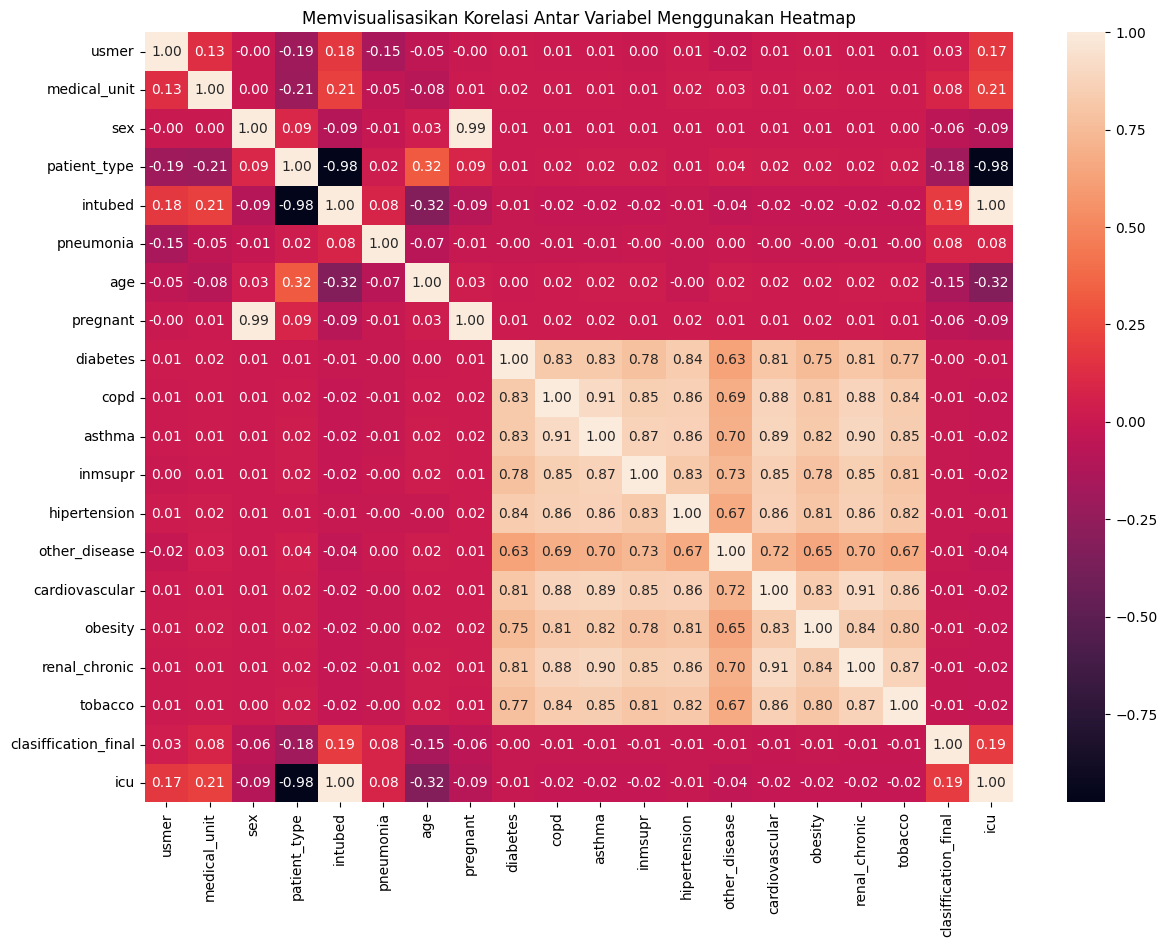

In [20]:
plt.figure(figsize=(14,10))
sns.heatmap(pd.DataFrame(matrix[0].toArray(),columns=features,index=features),fmt='.2f',annot=True, xticklabels=features, yticklabels=features)
plt.title("Memvisualisasikan Korelasi Antar Variabel Menggunakan Heatmap")
plt.show()

<h3><b>SELEKSI FITUR PREDIKSI</b></h3>

In [21]:
fitur_prediksi = ['age','medical_unit','usmer','clasiffication_final']
assembler = VectorAssembler(inputCols=fitur_prediksi,outputCol='independentFeature')
df_prediction = assembler.transform(df).select('independentFeature','patient_type')

<h3><b>MENAMPILKAN HASIL VECTOR INDEPENDENT FEATURE</b></h3>

In [22]:
df_prediction.show(5)

+------------------+------------+
|independentFeature|patient_type|
+------------------+------------+
|[65.0,1.0,2.0,3.0]|           0|
|[72.0,1.0,2.0,5.0]|           0|
|[55.0,1.0,2.0,3.0]|           1|
|[53.0,1.0,2.0,7.0]|           0|
|[68.0,1.0,2.0,3.0]|           0|
+------------------+------------+
only showing top 5 rows



<h2><b>BUILDING MODEL PREDICTION</b></h2>

<h3><b>LINEAR REGRESSION</b></h3>

<h4><b>SPLIT DATASET</b></h4>

In [23]:
train_data,test_data = df_prediction.randomSplit([0.7,0.3])

<h4><b>BUILD MODEL PREDICTION</b></h4>

In [24]:
linreg = LinearRegression(featuresCol='independentFeature',labelCol='patient_type')
linreg = linreg.fit(train_data)

23/12/11 06:01:18 WARN Instrumentation: [23d5ed9c] regParam is zero, which might cause numerical instability and overfitting.


<h4><b>PREDICTION DATA</b></h4>

In [25]:
predictions = linreg.transform(test_data)

In [26]:
prediction_data = linreg.evaluate(test_data)

<h4><b>SHOW PREDICTION DATA</b></h4>

In [27]:
prediction_data.predictions.show(5)

+------------------+------------+-------------------+
|independentFeature|patient_type|         prediction|
+------------------+------------+-------------------+
| [0.0,2.0,1.0,5.0]|           1|0.12145045285454298|
| [0.0,2.0,1.0,6.0]|           0|0.09543585645299513|
| [0.0,2.0,1.0,7.0]|           1|0.06942126005144728|
| [0.0,2.0,1.0,7.0]|           1|0.06942126005144728|
| [0.0,3.0,1.0,3.0]|           0| 0.1575220298131994|
+------------------+------------+-------------------+
only showing top 5 rows



<h4><b>EVALUASI MODEL DENGAN RMSE</b></h4>

In [28]:
evaluator = RegressionEvaluator(labelCol="patient_type", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Nilai Root Mean Squared Error (RMSE): {rmse}")

Nilai Root Mean Squared Error (RMSE): 0.3578731562149917


<h4><b>EVALUASI MODEL DENGAN MSE</b></h4>

In [29]:
evaluator = RegressionEvaluator(labelCol="patient_type", predictionCol="prediction", metricName="mse")
mse = evaluator.evaluate(predictions)
print(f"Nili Mean Square Error (MSE): {mse}")

Nili Mean Square Error (MSE): 0.12807319593927985


<h3><b>LOGISTIC REGRESSION</b></h3>

<h4><b>SPLIT DATASET</b></h4>

In [30]:
train_data,test_data = df_prediction.randomSplit([0.7,0.3])

<h4><b>BUILD MODEL PREDICTION</b></h4>

In [31]:
logreg = LogisticRegression(featuresCol='independentFeature',labelCol='patient_type',maxIter=10, regParam=0.3, elasticNetParam=0.8, family="multinomial")

<h4><b>TRAINING MODEL</b></h4>

In [32]:
logreg_model = logreg.fit(train_data)

<h4><b>PREDICTION DATA FROM MODEL</b></h4>

In [33]:
logreg_prediction = logreg_model.transform(test_data)

<h4><b>HASIL PREDIKSI</b></h4>

In [34]:
logreg_prediction.show(5)

+------------------+------------+--------------------+--------------------+----------+
|independentFeature|patient_type|       rawPrediction|         probability|prediction|
+------------------+------------+--------------------+--------------------+----------+
| [0.0,2.0,1.0,7.0]|           1|[0.72329594488398...|[0.80947336828262...|       0.0|
| [0.0,3.0,1.0,3.0]|           0|[0.72329594488398...|[0.80947336828262...|       0.0|
| [0.0,3.0,1.0,3.0]|           0|[0.72329594488398...|[0.80947336828262...|       0.0|
| [0.0,3.0,1.0,3.0]|           0|[0.72329594488398...|[0.80947336828262...|       0.0|
| [0.0,3.0,1.0,3.0]|           1|[0.72329594488398...|[0.80947336828262...|       0.0|
+------------------+------------+--------------------+--------------------+----------+
only showing top 5 rows



<h4><b>MEMBUAT FUNGSI UNTUK DEFINISI MODEL</b></h4>

In [35]:
def evaluator_logistic(metricName):
    return MulticlassClassificationEvaluator(
    labelCol='patient_type',
    predictionCol='prediction',
    metricName=metricName
    )

<h4><b>EVALUASI MODEL PREDIKSI ACCURACY</b></h4>

In [36]:
evaluator = evaluator_logistic('accuracy')
accuracy = evaluator.evaluate(logreg_prediction)
print(f'Test Accuracy: {accuracy:.2%}')

Test Accuracy: 80.87%


<h4><b>EVALUASI MODEL PREDIKSI F1</b></h4>

In [37]:
evaluator = evaluator_logistic('f1')
f1 = evaluator.evaluate(logreg_prediction)
print(f"Nilai Evaluasi F1-Score : {f1:.2%} %" )

Nilai Evaluasi F1-Score : 72.31% %


<h4><b>EVALUASI MODEL PREDIKSI PRESISI</b></h4>

In [38]:
evaluator = evaluator_logistic('weightedPrecision')
f1 = evaluator.evaluate(logreg_prediction)
print(f"Nilai Evaluasi Presisi Model : {f1:.2%} %" )

Nilai Evaluasi Presisi Model : 65.40% %


<h4><b>EVALUASI MODEL PREDIKSI RECALL</b></h4>

In [39]:
evaluator = evaluator_logistic('weightedRecall')
f1 = evaluator.evaluate(logreg_prediction)
print(f"Nilai Evaluasi Presisi Model : {f1:.2%} %" )

Nilai Evaluasi Presisi Model : 80.87% %


<h3><b>RANDOM FOREST</b></h3>

<h4><b>SPLITING DATA</b></h4>

In [40]:
train_data,test_data = df_prediction.randomSplit([0.7,0.3])

<h4><b>BUILDING MODEL PREDICITON</b></h4>

In [41]:
randomForest = RandomForestClassifier(labelCol="patient_type",featuresCol='independentFeature',numTrees=100)

<h4><b>TRAINING MODEL PREDICTION</b></h4>

In [42]:
ranrest_model = randomForest.fit(train_data)

23/12/11 06:03:02 WARN MemoryStore: Not enough space to cache rdd_465_3 in memory! (computed 30.1 MiB so far)
23/12/11 06:03:02 WARN MemoryStore: Not enough space to cache rdd_465_5 in memory! (computed 30.1 MiB so far)
23/12/11 06:03:02 WARN BlockManager: Persisting block rdd_465_5 to disk instead.
23/12/11 06:03:02 WARN BlockManager: Persisting block rdd_465_3 to disk instead.


<h4><b>PREDICT DATA FROM MODEL</b></h4>

In [43]:
predictions = ranrest_model.transform(test_data)

<h4><b>EVALUASI MODEL ACCURACY</b></h4>

In [44]:
evaluator_ranrest = MulticlassClassificationEvaluator(labelCol='patient_type',predictionCol='prediction',metricName='accuracy')
accuracy_ranrest = evaluator_ranrest.evaluate(predictions)
print(f"Nilai Accuracy Model Random Forest : {accuracy_ranrest:.2%}")

Nilai Accuracy Model Random Forest : 84.58%


<h4><b>EVALUASI MODEL DENGAN F1-Score</b></h4>

In [45]:
evaluator_ranrest = MulticlassClassificationEvaluator(labelCol='patient_type',predictionCol='prediction',metricName='f1')
accuracy_ranrest = evaluator_ranrest.evaluate(predictions)
print(f"Nilai F1-Score Model Random Forest : {accuracy_ranrest:.2%}")

Nilai F1-Score Model Random Forest : 82.41%


<h4><b>EVALUASI MODEL DENGAN PRESISI</b></h4>

In [46]:
evaluator_ranrest = MulticlassClassificationEvaluator(labelCol='patient_type',predictionCol='prediction',metricName='weightedPrecision')
accuracy_ranrest = evaluator_ranrest.evaluate(predictions)
print(f"Nilai Presisi Model Random Forest : {accuracy_ranrest:.2%}")

Nilai Presisi Model Random Forest : 82.98%


<h4><b>EVALUASI MODEL DENGAN RECALL</b></h4>

In [47]:
evaluator_ranrest = MulticlassClassificationEvaluator(labelCol='patient_type',predictionCol='prediction',metricName='weightedRecall')
accuracy_ranrest = evaluator_ranrest.evaluate(predictions)
print(f"Nilai Presisi Model Random Forest : {accuracy_ranrest:.2%}")

Nilai Presisi Model Random Forest : 84.58%


<h3><b>MULTILAYER PERCEPTRON CLASSIFIER</b></h3>

<h4><b>SPLITTING DATA</b></h4>

In [48]:
train_data,test_data = df_prediction.randomSplit([0.7,0.3])

<h4><b>INITIAL BUILDING MODEL MLP</b></h4>

In [49]:
layer = [4,5,2]
mlp = MultilayerPerceptronClassifier(layers=layer, labelCol="patient_type", featuresCol="independentFeature", seed=42)

<h4><b>TRAINING MODEL</b></h4>

In [50]:
mlp_model = mlp.fit(train_data)

<h4><b>PREDICTION DATA FROM MODEL</b></h4>

In [51]:
predictions = mlp_model.transform(test_data)

<h4><b>EVALUASI MODEL PREDIKSI DENGAN ACCURACY</b></h4>

In [52]:
evaluator_mlp = MulticlassClassificationEvaluator(labelCol='patient_type',predictionCol='prediction',metricName='accuracy')
accuracy_mlp = evaluator_mlp.evaluate(predictions)
print(f"Nilai Accuracy Model Random Forest : {accuracy_mlp:.2%}")

Nilai Accuracy Model Random Forest : 84.30%


<h4><b>EVALUASI MODEL PREDIKSI DENGAN F1-Score</b></h4>

In [53]:
evaluator_mlp = MulticlassClassificationEvaluator(labelCol='patient_type',predictionCol='prediction',metricName='f1')
f1_mlp = evaluator_mlp.evaluate(predictions)
print(f"Nilai Accuracy Model Random Forest : {f1_mlp:.2%}")

Nilai Accuracy Model Random Forest : 82.66%


<h4><b>EVALUASI MODEL PREDIKSI DENGAN PRESISI</b></h4>

In [54]:
evaluator_mlp = MulticlassClassificationEvaluator(labelCol='patient_type',predictionCol='prediction',metricName='weightedPrecision')
presisi_mlp = evaluator_mlp.evaluate(predictions)
print(f"Nilai Accuracy Model Random Forest : {presisi_mlp:.2%}")

Nilai Accuracy Model Random Forest : 82.60%


<h4><b>EVALUASI MODEL PREDIKSI DENGAN RECALL</b></h4>

In [55]:
evaluator_mlp = MulticlassClassificationEvaluator(labelCol='patient_type',predictionCol='prediction',metricName='weightedRecall')
recall_mlp = evaluator_mlp.evaluate(predictions)
print(f"Nilai Accuracy Model Random Forest : {f1_mlp:.2%}")

Nilai Accuracy Model Random Forest : 82.66%


<h3><b>NAIVE BAYES</b></h3>

<h4><b>SPLITTING DATA</b></h4>

In [56]:
train_data,test_data = df_prediction.randomSplit([0.7,0.3])

<h4><b>BUILDING MODEL</b></h4>

In [57]:
nb = NaiveBayes(featuresCol='independentFeature', labelCol='patient_type', smoothing=1.0, modelType="multinomial")

<h4><b>TRAINING MODEL</b></h4>

In [58]:
nb_model = nb.fit(train_data)

<h4><b>PREDICTION MODEL</b></h4>

In [59]:
predictions = nb_model.transform(test_data)

<h4><b>EVALUASI MODEL DENGAN ACCURACY</b></h4>

In [60]:
evaluator_bayes = MulticlassClassificationEvaluator(
    labelCol='patient_type',
    predictionCol='prediction',
    metricName='accuracy'
)
accuracy_bayes = evaluator_bayes.evaluate(predictions)
print(f"Nilai Accuracy Model Dengan Naive Bayes : {accuracy_bayes:.2%}")

Nilai Accuracy Model Dengan Naive Bayes : 80.27%


<h4><b>EVALUASI MODEL DENGAN F1-Score</b></h4>

In [61]:
evaluator_bayes = MulticlassClassificationEvaluator(
    labelCol='patient_type',
    predictionCol='prediction',
    metricName='f1'
)
f1_bayes = evaluator_bayes.evaluate(predictions)
print(f"Nilai F1-Score Model Dengan Naive Bayes : {f1_bayes:.2%}")

Nilai F1-Score Model Dengan Naive Bayes : 80.76%


<h4><b>EVALUASI MODEL DENGAN PRESISI</b></h4>

In [62]:
evaluator_bayes = MulticlassClassificationEvaluator(
    labelCol='patient_type',
    predictionCol='prediction',
    metricName='weightedPrecision'
)
presisi_bayes = evaluator_bayes.evaluate(predictions)
print(f"Nilai Presisi Model Dengan Naive Bayes : {presisi_bayes:.2%}")

Nilai Presisi Model Dengan Naive Bayes : 81.39%


<h4><b>EVALUASI MODEL DENGAN RECALL</b></h4>

In [63]:
evaluator_bayes = MulticlassClassificationEvaluator(
    labelCol='patient_type',
    predictionCol='prediction',
    metricName='weightedRecall'
)
recall_bayes = evaluator_bayes.evaluate(predictions)
print(f"Nilai Recall Model Dengan Naive Bayes : {recall_bayes:.2%}")

Nilai Recall Model Dengan Naive Bayes : 80.27%


<h2><b>TUNING MODEL</b></h2>

<h3><b>TUNING MODEL RANDOM FOREST</b></h3>

<h4><b>SPLITTING DATASET</b></h4>

In [64]:
train_data,test_data = df_prediction.randomSplit([0.7,0.3])

<h4><b>CREATE MODEL RANDOM FOREST</b></h4>

In [110]:
rf = RandomForestClassifier(labelCol='patient_type', featuresCol='independentFeature')

<h4><b>CREATE PARAMATER GRID FOR HYPERPARAMATER TUNING</b></h4>

In [111]:
param_grid = (ParamGridBuilder()
    .addGrid(rf.numTrees, [10, 20, 30])
    .addGrid(rf.maxDepth, [5, 10, 15])
    .addGrid(rf.featureSubsetStrategy, ['auto', 'sqrt', 'log2'])
    .addGrid(rf.minInstancesPerNode, [1, 5, 10])
    .build())

<h4><b>CREATE EVALUATOR MODEL</b></h4>

In [112]:
evaluator = MulticlassClassificationEvaluator(labelCol='patient_type', predictionCol='prediction', metricName='accuracy')

<h4><b>CREATE CROSS-VALIDATOR MODEL PREDICTION</b></h4>

In [113]:
cv = CrossValidator(estimator=rf, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=3)

<h4><b>TRAINING RANDOM FOREST TUNING</b></h4>

In [114]:
tuning_ranrest_model = cv.fit(train_data)

23/12/11 08:57:22 WARN DAGScheduler: Broadcasting large task binary with size 1107.6 KiB
23/12/11 08:57:24 WARN DAGScheduler: Broadcasting large task binary with size 1415.1 KiB
23/12/11 08:57:26 WARN DAGScheduler: Broadcasting large task binary with size 1685.1 KiB
23/12/11 08:57:28 WARN DAGScheduler: Broadcasting large task binary with size 1897.8 KiB
23/12/11 08:57:29 WARN DAGScheduler: Broadcasting large task binary with size 2.0 MiB
23/12/11 08:57:44 WARN DAGScheduler: Broadcasting large task binary with size 1015.5 KiB
23/12/11 08:57:45 WARN DAGScheduler: Broadcasting large task binary with size 1269.3 KiB
23/12/11 08:57:46 WARN DAGScheduler: Broadcasting large task binary with size 1499.6 KiB
23/12/11 08:57:48 WARN DAGScheduler: Broadcasting large task binary with size 1676.5 KiB
23/12/11 08:57:49 WARN DAGScheduler: Broadcasting large task binary with size 1807.9 KiB
23/12/11 08:58:03 WARN DAGScheduler: Broadcasting large task binary with size 1183.9 KiB
23/12/11 08:58:04 WARN D

<h4><b>PREDICTION DATA FROM MODEL</b></h4>

In [115]:
predictions = tuning_ranrest_model.transform(test_data)

<h4><b>EVALUASI MODEL DENGAN ACCURACY</b></h4>

In [116]:
evaluator_ranrest = MulticlassClassificationEvaluator(
    labelCol='patient_type',
    predictionCol='prediction',
    metricName='accuracy'
)
accuracy_ranrest = evaluator_ranrest.evaluate(predictions)
print(f"Nilai Accuracy Model Dengan Random Forest Tuning : {accuracy_ranrest:.2%}")

23/12/11 10:42:57 WARN DAGScheduler: Broadcasting large task binary with size 1312.0 KiB


Nilai Accuracy Model Dengan Random Forest Tuning : 85.28%


<h4><b>EVALUASI MODEL DENGAN F1-Score</b></h4>

In [117]:
evaluator_ranrest = MulticlassClassificationEvaluator(
    labelCol='patient_type',
    predictionCol='prediction',
    metricName='f1'
)
f1_ranrest = evaluator_ranrest.evaluate(predictions)
print(f"Nilai F1-Score Model Dengan Random Forest Tuning : {f1_ranrest:.2%}")

23/12/11 10:43:10 WARN DAGScheduler: Broadcasting large task binary with size 1312.0 KiB


Nilai F1-Score Model Dengan Random Forest Tuning : 83.66%


<h4><b>EVALUASI MODEL DENGAN PRESISI</b></h4>

In [118]:
evaluator_ranrest = MulticlassClassificationEvaluator(
    labelCol='patient_type',
    predictionCol='prediction',
    metricName='weightedPrecision'
)
presisi_ranrest = evaluator_ranrest.evaluate(predictions)
print(f"Nilai Presisi Model Dengan Random Forest Tuning : {presisi_ranrest:.2%}")

23/12/11 10:43:23 WARN DAGScheduler: Broadcasting large task binary with size 1312.0 KiB


Nilai Presisi Model Dengan Random Forest Tuning : 83.86%


<h4><b>EVALUASI MODEL DENGAN RECALL</b></h4>

In [119]:
evaluator_ranrest = MulticlassClassificationEvaluator(
    labelCol='patient_type',
    predictionCol='prediction',
    metricName='weightedRecall'
)
recall_ranrest = evaluator_ranrest.evaluate(predictions)
print(f"Nilai Recall Model Dengan Random Forest Tuning : {recall_ranrest:.2%}")

23/12/11 10:43:43 WARN DAGScheduler: Broadcasting large task binary with size 1312.0 KiB


Nilai Recall Model Dengan Random Forest Tuning : 85.28%


<h3><b>TUNING MODEL MULTILAYER PERCEPTRON CLASSIFIER</b></h3>

<h4><b>SPLIT DATASET</b></h4>

In [97]:
train_data,test_data = df_prediction.randomSplit([0.7,0.3])

<h4><b>CREATE MLP MODEL TUNING</b></h4>

In [98]:
layers = [4, 10, 5, 2]
mlp = MultilayerPerceptronClassifier(layers=layers, labelCol='patient_type', featuresCol='independentFeature')

<h4><b>CREATE PARAMTER GRID FOR HYPERPARAMATER MODEL TUNING</b></h4>

In [99]:
param_grid = (ParamGridBuilder()
    .addGrid(mlp.maxIter, [50, 100, 200])
    .addGrid(mlp.blockSize, [32, 64, 128])
    .addGrid(mlp.stepSize, [0.01, 0.1, 0.2])
    .build())

<h4><b>CREATE EVALUATOR MODEL</b></h4>

In [100]:
evaluator = MulticlassClassificationEvaluator(labelCol='patient_type', predictionCol='prediction', metricName='accuracy')

<h4><b>CREATE CROSS VALIDATION MODEL</b></h4>

In [102]:
cv = CrossValidator(estimator=mlp, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=3)

<h4><b>TRAINING MODEL MLP TUNING</b></h4>

In [103]:
mlp_tuning_model = cv.fit(train_data)

<h4><b>PREDICTION DATA FROM MODEL</b></h4>

In [104]:
predictions = mlp_tuning_model.transform(test_data)

<h4><b>EVALUASI MODEL DENGAN ACCURACY</b></h4>

In [105]:
evaluator_mlp = MulticlassClassificationEvaluator(
    labelCol='patient_type',
    predictionCol='prediction',
    metricName='accuracy'
)
accuracy_mlp = evaluator_mlp.evaluate(predictions)
print(f"Nilai Accuracy Model Dengan MLP Tuning : {accuracy_mlp:.2%}")

Nilai Accuracy Model Dengan MLP Tuning : 84.54%


<h4><b>EVALUASI MODEL DENGAN F1-Score</b></h4>

In [106]:
evaluator_mlp = MulticlassClassificationEvaluator(
    labelCol='patient_type',
    predictionCol='prediction',
    metricName='f1'
)
f1_mlp = evaluator_mlp.evaluate(predictions)
print(f"Nilai F1-Score Model Dengan MLP Tuning : {f1_mlp:.2%}")

Nilai F1-Score Model Dengan MLP Tuning : 82.57%


<h4><b>EVALUASI MODEL DENGAN PRESISI</b></h4>

In [107]:
evaluator_mlp = MulticlassClassificationEvaluator(
    labelCol='patient_type',
    predictionCol='prediction',
    metricName='weightedPrecision'
)
presisi_mlp = evaluator_mlp.evaluate(predictions)
print(f"Nilai Presisi Model Dengan MLP Tuning : {presisi_mlp:.2%}")

Nilai Presisi Model Dengan MLP Tuning : 82.86%


<h4><b>EVALUASI MODEL DENGAN RECALL</b></h4>

In [108]:
evaluator_mlp = MulticlassClassificationEvaluator(
    labelCol='patient_type',
    predictionCol='prediction',
    metricName='weightedRecall'
)
recall_mlp = evaluator_mlp.evaluate(predictions)
print(f"Nilai Recall Model Dengan MLP Tuning : {recall_mlp:.2%}")

Nilai Recall Model Dengan MLP Tuning : 84.54%


<h2><b>VISUALISASION BEST MODEL (RANDOM FOREST)</b></h2>

<h3><b>CONFUSSION MATRIX</b></h3>

<h4><b>MEMBUAT DATA PREDIKSI DARI MODEL RANDOM FOREST TUNING</b></h4>

In [120]:
predictions = tuning_ranrest_model.transform(test_data)

<h4><b>MENDAPATKAN NILAI AKTUAL DAN PREDIKSI</b></h4>

In [121]:
y_true = predictions.select('patient_type').toPandas()
y_pred = predictions.select('prediction').toPandas()

23/12/11 10:48:27 WARN DAGScheduler: Broadcasting large task binary with size 1296.9 KiB


<h4><b>MEMBUAT CONFUSSION MATRIX</b></h4>

In [124]:
conf_matrix = confusion_matrix(y_true, y_pred)

<h4><b>MEMBUAT DATAFRAME UNTUK VISUALISASI</b></h4>

In [125]:
conf_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

<h4><b>VISUALISASI CONFUSSION MATRIX</b></h4>

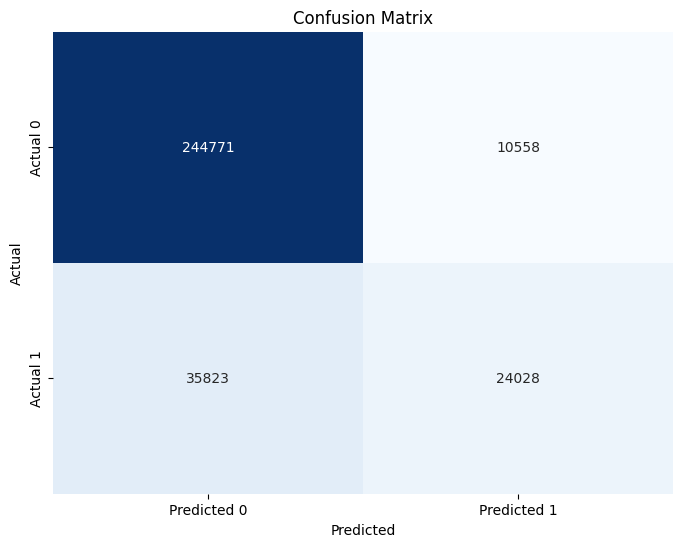

In [126]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h3><b>ACCURACY</b></h3>

<h4><b>MEMBUAT EVALUATOR</b></h4>

In [127]:
evaluator = MulticlassClassificationEvaluator(labelCol="patient_type", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

23/12/11 10:52:21 WARN DAGScheduler: Broadcasting large task binary with size 1312.0 KiB


<h4><b>MEMBUAT DATA UNTUK PLOTTING</b></h4>

In [128]:
labels = ['Akurasi']
values = [accuracy]

<h4><b>VISUALISASI ACCURACY</b></h4>

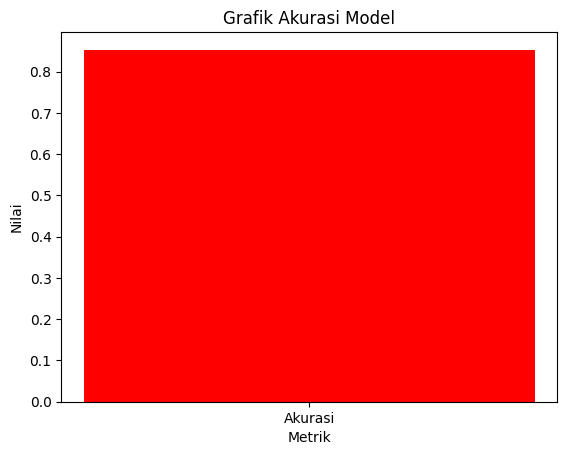

In [129]:
plt.bar(labels, values, color=['red'])

plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.title('Grafik Akurasi Model')

plt.show()